# Convolutional Neural Networks
### Kyle McLester

In [1]:
# preparation
import tensorflow as tf
from tensorflow import keras 
# Common imports
import numpy as np
import pandas as pd
from copy import deepcopy as copy

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [2]:
n_label = [ 'T-shirt/top', 'Trouser', 'Pullover', 
            'Dress', 'Coat', 'Sandal', 'Shirt', 
            'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [5]:
print("Training data shape: {}".format(X_train.shape))
print("Training labels shape: {}".format(y_train.shape))

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


In [6]:
Ntrain, Ntest = X_train.shape[0], X_test.shape[0]

In [7]:
def plot_image(image, name):
    """
        Plot and image and its corresponding name.
        
        image (numpy.ndarray): Image to be plotted.
        
        name (str): Name of the image that will act as the title.
    """
    plt.imshow(image, cmap="binary")
    plt.title(name)
    plt.axis("off")

In [8]:
def plot_nImages(X, y, n=100):
    """
        Plots image data and their labels.
        
        X (numpy.ndarray): Image training data.
        
        y (numpy.ndarray): Labels for images formatted as 1-D vector.
    """
    plt.figure(figsize=(12,12))
    nr = int(np.ceil(np.sqrt(n)))
    
    # Remove channel dimension for plotting
    if len(X.shape) > 3:
        X = X.squeeze()
        
    for i in range(n):
        plt.subplot(nr, nr, 1 + i)
        plot_image(X[i], n_label[y[i]])
    plt.tight_layout()

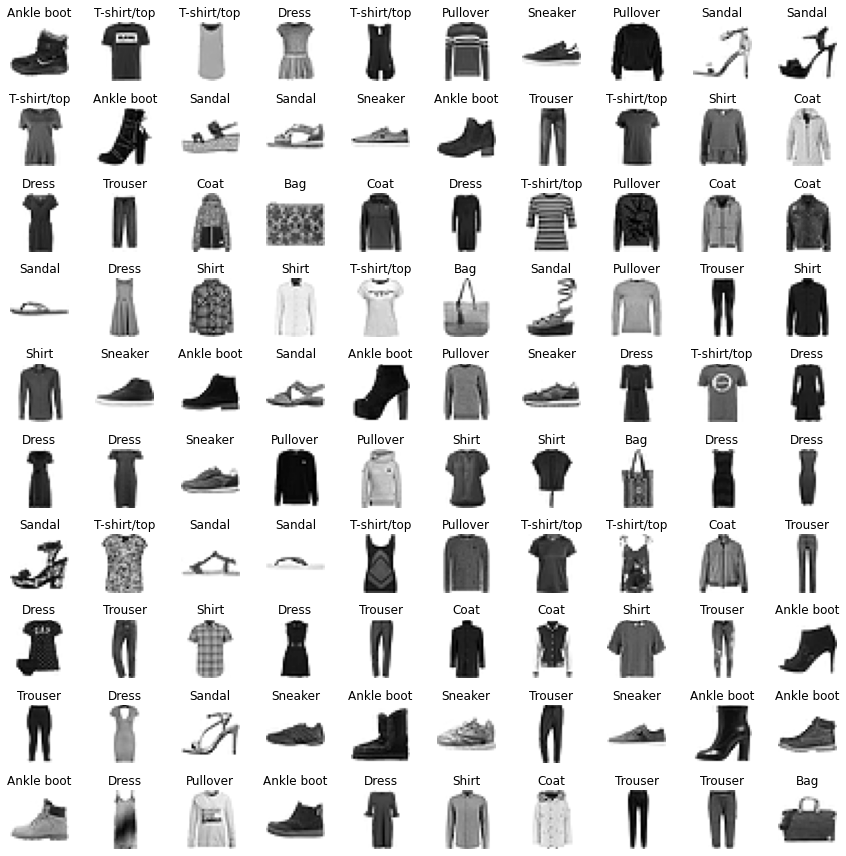

In [9]:
plot_nImages(X_train, y_train, 100)

In [10]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [11]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv2_fmaps = 64

n_fc1 = 64
n_outputs = 10

In [12]:
from functools import partial

# Partially declares a class - can later be fully initialized!
DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")


cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[28, 28, 1]),
    DefaultConv2D(filters=conv1_fmaps),
    DefaultConv2D(filters=conv2_fmaps),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=n_fc1, activation='relu'),
    tf.keras.layers.Dense(units=n_outputs, activation='softmax'),
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 822,346
Trainable params: 822,346
Non-trainable params: 0
__________________________________________________

In [13]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [17]:
def use_smaller_train(X, y, ratio=0.1):
    """
        X (numpy.ndarray): Data to be subsampled
        
        y (numpy.ndarray): Labels corresponding to the data
        
        ratio (float): Percent of data to use from each class 
        
        Return:
            Return a portion of the pass data X and their corresponding labels y
    """
    N = X.shape[0]
    labels = np.unique(y)
    indx = []
    for lbl in labels:
        l_idx = np.where(y_train==lbl)[0]
        Nslice = int(len(l_idx) * ratio)
        indx.extend(l_idx[:Nslice])
    return X[indx], y[indx]

In [18]:
mini_Xtrain, mini_ytrain = use_smaller_train(X_train, y_train)

In [19]:
mini_Xtrain.shape, mini_ytrain.shape

((6000, 28, 28, 1), (6000,))

In [20]:
history = cnn.fit(X_train, y_train, batch_size=1000, epochs=5, validation_split=0.2)

Epoch 1/5
48/48 [==============================] - 26s 523ms/step - loss: 1.2989 - accuracy: 0.5646 - val_loss: 0.4942 - val_accuracy: 0.8213
Epoch 2/5
48/48 [==============================] - 25s 514ms/step - loss: 0.4910 - accuracy: 0.8204 - val_loss: 0.4005 - val_accuracy: 0.8583
Epoch 3/5
48/48 [==============================] - 25s 515ms/step - loss: 0.3945 - accuracy: 0.8584 - val_loss: 0.3703 - val_accuracy: 0.8685
Epoch 4/5
48/48 [==============================] - 25s 518ms/step - loss: 0.3459 - accuracy: 0.8749 - val_loss: 0.3357 - val_accuracy: 0.8803
Epoch 5/5
48/48 [==============================] - 25s 524ms/step - loss: 0.3205 - accuracy: 0.8862 - val_loss: 0.2973 - val_accuracy: 0.8953


Text(0, 0.5, 'loss')

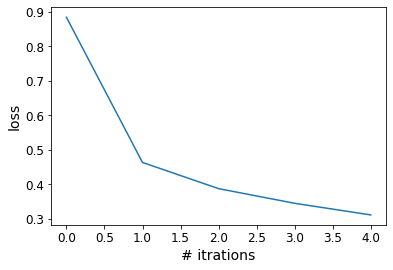

In [21]:
plt.plot(history.history['loss'])
plt.xlabel("# itrations")
plt.ylabel("loss")

In [22]:
score = cnn.evaluate(X_test, y_test)
score

313/313 [==============================] - 2s 5ms/step - loss: 0.3146 - accuracy: 0.8871


[0.3146466910839081, 0.8870999813079834]

In [23]:
Ytest_probs = cnn.predict(X_test)
Ytest_preds = np.argmax(Ytest_probs, axis=1)

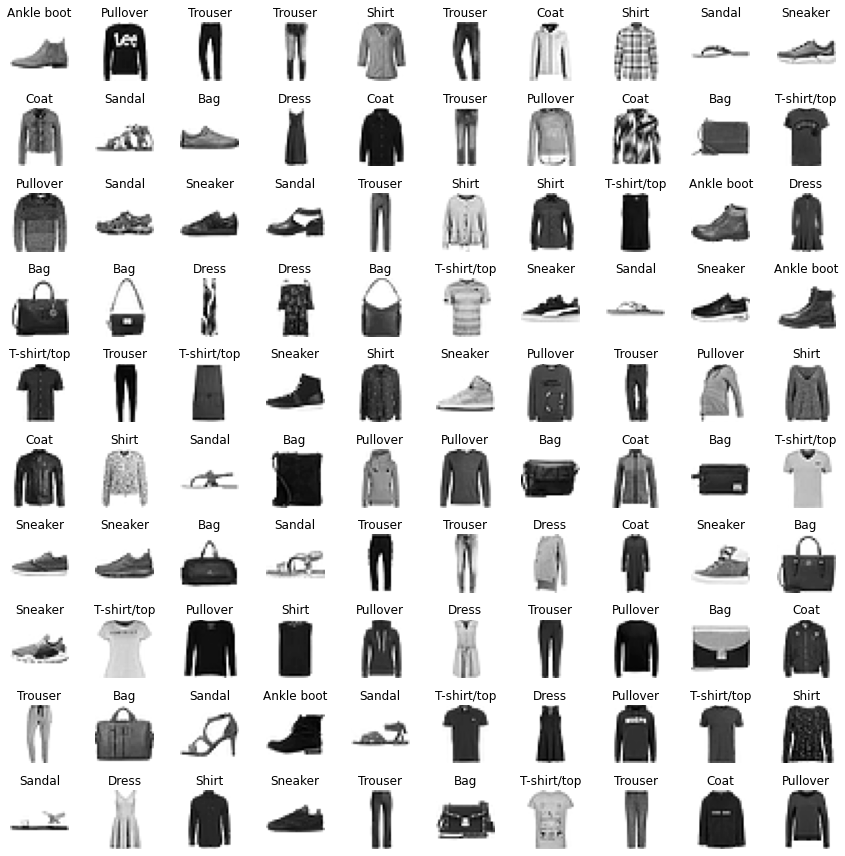

In [24]:
plot_nImages(X_test, Ytest_preds, 100)

In [25]:
mislabeled = np.all(Ytest_preds[:100] == y_test[:100])
mislabeled

False

In [26]:
mislabeled_indices = np.where(Ytest_preds[:100] != y_test[:100])
mislabeled_indices

(array([12, 23, 25, 40, 42, 49, 51, 66, 67, 68], dtype=int64),)